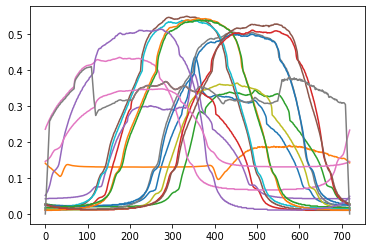

In [15]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
observations = []
avgs = []
for file in os.listdir():
    if 'fits' in file:
        obs = np.flip(fits.open(file)[0].data)
        observations.append(obs)
        avgs.append(np.mean(obs, 0))
        plt.plot(np.mean(obs, 0))
plt.show()

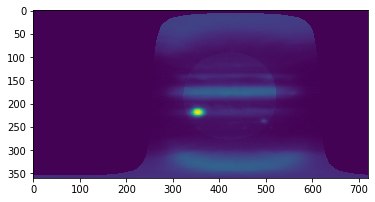

In [76]:
plt.imshow(observations[0])
plt.show()

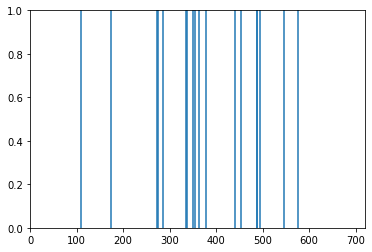

In [65]:
plt.xlim(0, 720)
for obs in avgs:
    plt.axvline(np.argmax(obs))
plt.show()

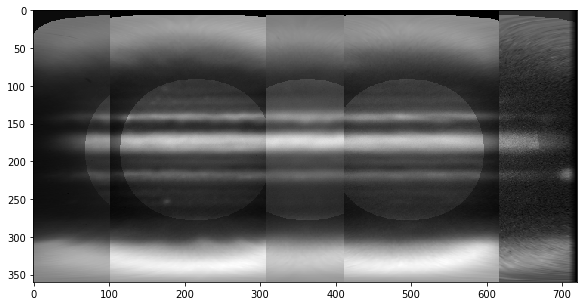

In [121]:
brightnesscutoff = 0.2
nbins = 7
binstarts = [int(x) for x in np.linspace(0, 720, nbins+1)]
lmap = np.full((360, 720), 0.)
nebStart = 135
nebEnd = 155
standardBrightness = 0.5
cmaps = []

#choose the maps with the highest average brightness over the bin
for bin in range(len(binstarts)-1):
    bestObs = None
    maxBrightness = 0
    for obs in observations:
        avgBrightness = np.mean(obs[:, binstarts[bin]:binstarts[bin+1]])
        if avgBrightness > maxBrightness:
            maxBrightness = avgBrightness
            bestObs = obs
    lmap[:, binstarts[bin]:binstarts[bin+1]] = bestObs[:, binstarts[bin]:binstarts[bin+1]]
    cmaps.append(bestObs)

#stitch together at the bin edges
gradient = 0
for bin in range(len(binstarts)-2):
    stitchStart = binstarts[bin+1]-gradient//2
    stitchEnd = binstarts[bin+1]+gradient//2
    lmap[:, stitchStart:stitchEnd] = (cmaps[bin][:, stitchStart:stitchEnd] + cmaps[bin+1][:, stitchStart:stitchEnd]) / 2.0

plt.figure(figsize=(10, 5))
plt.imshow(lmap, cmap='gray')
plt.show()

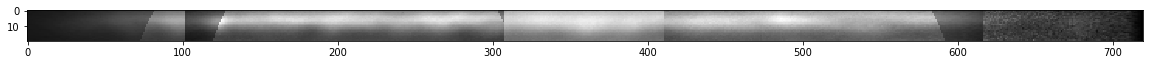

In [120]:
neb = lmap[135:155]
plt.figure(figsize=(20, 15))
plt.imshow(neb, cmap='gray')
plt.show()

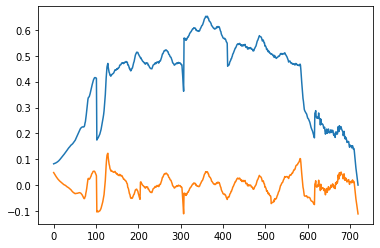

In [124]:
from scipy.signal import detrend
nebAvg = np.mean(neb, 0)
lon = np.arange(len(nebAvg))
plt.plot(lon, nebAvg)
avg_detrended = detrend(nebAvg, bp = binstarts[:-1]) #pixels where separate cmaps meet
plt.plot(lon, avg_detrended)
plt.show()